In [1]:
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd 

In [4]:
data_set= pd.read_csv(r'C:\Users\Vinod\Desktop\major project\stocks\microsoft_stocks.csv')  
data_set.dropna(axis='columns')

data_set.fillna(0, inplace=True)
data_set

,Unnamed: 0,Unnamed: 0.1,Date,Open,High,Low,Close,Volume,Trend,Close_10,Future Trend,Total score
0,0.0,0.0,20141231.0,41.321671,41.949497,41.074078,41.074078,21552500.0,-1.0,40.216362,-1.0,23
1,1.0,1.0,20150102.0,41.259780,41.931820,41.153670,41.348206,27913900.0,1.0,40.888405,-1.0,31
2,2.0,2.0,20150105.0,41.003344,41.321679,40.897233,40.967976,39673900.0,-1.0,41.021030,1.0,43
3,3.0,3.0,20150106.0,41.012201,41.339378,40.269418,40.366688,36447900.0,-1.0,40.605423,1.0,27
4,4.0,4.0,20150107.0,40.658473,41.082920,40.225186,40.879539,29114100.0,1.0,41.675385,1.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...
1683,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,18
1684,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,295
1685,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,185
1686,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,130


In [5]:
feature_df = data_set[['Trend','Total score']]


x = np.asarray(feature_df)

y = np.asarray(data_set['Future Trend'])


No handles with labels found to put in legend.


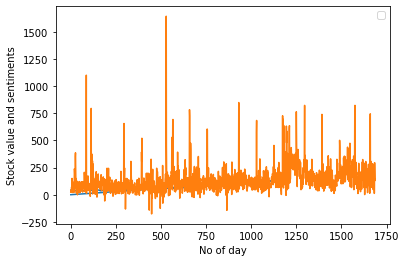

In [6]:
mtp.plot(data_set['Unnamed: 0'],data_set['Open'],data_set['Total score'])
mtp.xlabel("No of day")
mtp.ylabel("Stock value and sentiments")
mtp.legend()

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [8]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 20, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([ 1.,  1.,  1., -1.,  0.,  1.,  0., -1., -1.,  0., -1.,  0., -1.,
       -1.,  0.,  1.,  1.,  0., -1., -1.,  1., -1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  0.,  1., -1., -1.,  1.,  0.,  1.,  1., -1.,  1.,
        0.,  1.,  0.,  1.,  1., -1.,  0.,  0.,  0., -1.,  1.,  1.,  0.,
       -1.,  1.,  1.,  1.,  0.,  1., -1.,  0.,  0.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  0.,  0.,  0.,  0.,  1.,
        0.,  1., -1.,  1.,  0.,  0.,  0., -1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  0.,  0., -1.,  1.,  1.,  0.,
        1., -1.,  1., -1.,  1.,  1.,  1., -1.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0., -1., -1.,  1.,  1.,  0., -1.,  1.,  1., -1.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0., -1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1., -1.,  1., -1., -1.,
        0.,  1.,  1.,  1.,  0.,  1., -1.,  1.,  0.,  1., -1.,  0

In [10]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[ 33,   1,  60],
       [  0, 101,   0],
       [ 43,   0, 100]], dtype=int64)

In [11]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6923076923076923
